# Association Rules Mining With Apriori Algorithm

## On Titanic Dataset

In [1]:
%matplotlib inline

## Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Loading Dataset

In [3]:
titanic = pd.read_csv('/home/bhanuchander/course/Learn_MachineLearning/data/csv/titanic/train.csv')

nominal_cols = ['Embarked','Pclass','Age', 'Survived']

in_titanic= titanic[nominal_cols]

in_titanic['Embarked'].fillna('Unknown',inplace=True)

in_titanic['Age'].fillna(0, inplace=True)

## Binning

In [4]:
## Binning Method to categorize the Continous Variables

def binning(col, cut_points, labels=None):

  minval = col.min()
  maxval = col.max()

  break_points = [minval] + cut_points + [maxval]


  if not labels:
    labels = range(len(cut_points)+1)


  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [5]:
cut_points = [1, 10, 20, 50 ]

labels = ["Unknown", "Child", "Teen", "Adult", "Old"]

in_titanic['Age'] = binning(in_titanic['Age'], cut_points, labels)

# Replacing Binary with String
rep = {0: "False", 1: "True"}

in_titanic.replace({'Survived' : rep}, inplace=True)

print in_titanic.head()

  Embarked  Pclass    Age Survived
0        S       3  Adult    False
1        C       1  Adult     True
2        S       3  Adult     True
3        S       1  Adult     True
4        S       3  Adult    False


In [6]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print df.head()

       1      2      3  Adult      C  Child  False    Old      Q      S  \
0  False  False   True   True  False  False   True  False  False   True   
1   True  False  False   True   True  False  False  False  False  False   
2  False  False   True   True  False  False  False  False  False   True   
3   True  False  False   True  False  False  False  False  False   True   
4  False  False   True   True  False  False   True  False  False   True   

    Teen   True  Unknown  
0  False  False    False  
1  False   True    False  
2  False   True    False  
3  False   True    False  
4  False  False    False  


## All Nominal Values

In [7]:
print oht.columns_

['1', '2', '3', 'Adult', 'C', 'Child', 'False', 'Old', 'Q', 'S', 'Teen', 'True', 'Unknown']


In [8]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)

print output.head()

    support itemsets
0  0.242697      (1)
1  0.206742      (2)
2  0.550562      (3)
3  0.528090  (Adult)
4  0.615730  (False)


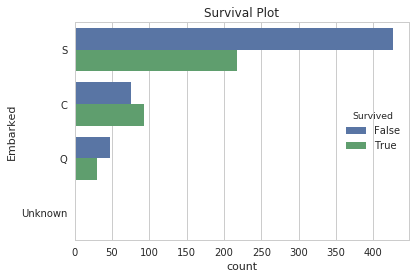

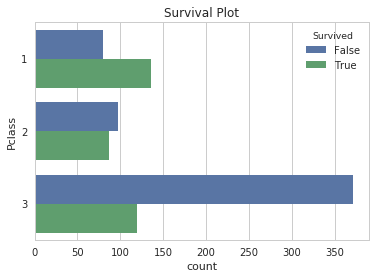

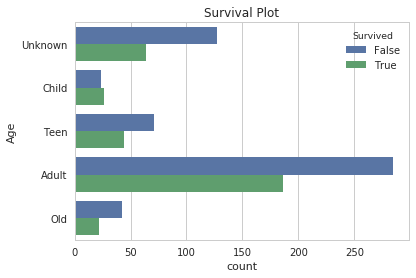

In [9]:
for x in ['Embarked', 'Pclass','Age']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=in_titanic)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
  antecedents     consequents  antecedent support  consequent support  \
0         (S)         (False)            0.723596            0.615730   
1         (S)      (3, False)            0.723596            0.416854   
2         (S)          (True)            0.723596            0.384270   
3         (S)      (3, Adult)            0.723596            0.248315   
4         (S)         (Adult)            0.723596            0.528090   
5         (S)  (False, Adult)            0.723596            0.319101   
6         (S)             (3)            0.723596            0.550562   

    support  confidence      lift  leverage  conviction  
0  0.479775    0.663043  1.076841  0.034236    1.140413  
1  0.321348    0.444099  1.065360  0.019715    1.049011  
2  0.243820    0.336957  0.876875 -0.034236    0.928642  
3  0.213483    0.295031  1.188134  0.033804    1.066267 

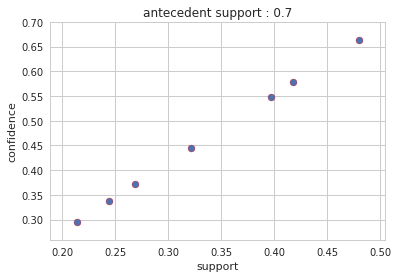

Empty Data Frame For Metric Type :  support  on Threshold :  0.5
['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
   antecedents consequents  antecedent support  consequent support   support  \
0          (S)     (False)            0.723596            0.615730  0.479775   
1      (False)         (S)            0.615730            0.723596  0.479775   
2   (S, False)         (3)            0.479775            0.550562  0.321348   
3       (S, 3)     (False)            0.396629            0.615730  0.321348   
4   (3, False)         (S)            0.416854            0.723596  0.321348   
5          (S)  (3, False)            0.723596            0.416854  0.321348   
6      (False)      (S, 3)            0.615730            0.396629  0.321348   
7          (3)  (S, False)            0.550562            0.479775  0.321348   
8      (False)     (Adult)            0.615730            0.528090  0.319101   
9      (

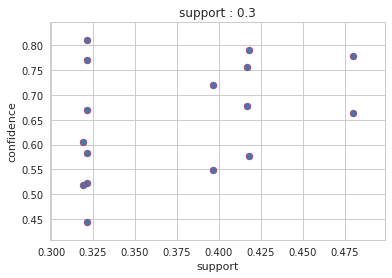

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
       antecedents consequents  antecedent support  consequent support  \
0              (S)     (False)            0.723596            0.615730   
1          (False)         (S)            0.615730            0.723596   
2       (S, False)         (3)            0.479775            0.550562   
3           (S, 3)     (False)            0.396629            0.615730   
4       (3, False)         (S)            0.416854            0.723596   
5          (False)      (S, 3)            0.615730            0.396629   
6              (3)  (S, False)            0.550562            0.479775   
7           (True)     (Adult)            0.384270            0.528090   
8          (False)     (Adult)            0.615730            0.528090   
9          (Adult)     (False)            0.528090            0.615730   
10             (3)     (False)            0.550562         

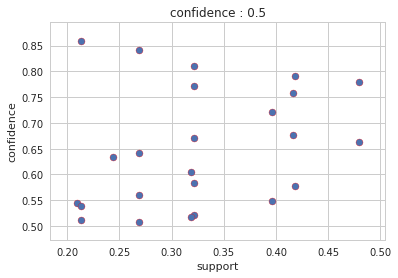

In [12]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('support', 0.3),
    ('confidence', 0.5)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print 'Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th
        continue
    print rules.columns.values
    print (rules)

    support=rules.as_matrix(columns=['support'])
    confidence=rules.as_matrix(columns=['confidence'])

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()